In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
data_features = np.load('./data/new_test_data_4-5/features.npy')
data_targets = np.load('./data/new_test_data_4-5/targets.npy')
data_features = data_features.astype(float)
data_targets = data_targets.astype(float)
data_targets = np.around(data_targets,decimals=2)
data_features.shape
# data_targets

(34, 248, 13)

In [64]:
data_features = data_features.reshape((34,3224))
data_targets = data_targets.reshape((3224,))
data_all = np.append(data_features,[data_targets],axis=0)    # 34 * 3224
# print(np.array(data_all).shape)
data_all = data_all.transpose()
# for x in range(35):
np.savetxt("./data/new_test_data_4-5/targets.csv",data_all,delimiter=",",fmt="%f")
# data_features[0][:250]
# data_targets[:250]
# data_all[34][:250]

In [65]:
data_csv = pd.read_csv("./data/new_test_data_4-5/targets.csv",header=None)
# 去除特征值全为0的行 和 去除目标值为0的行
data_csv = data_csv.loc[~(data_csv.loc[:,0:33]==0).all(axis=1) & ~(data_csv.loc[:,34]==0),:]
np.savetxt("./data/new_test_data_4-5/targets1.csv",data_csv,delimiter=",",fmt="%f")

In [66]:
data_csv = pd.read_csv("./data/new_test_data_4-5/targets1.csv",header=None)
features = data_csv.loc[1:1950,0:33]
trargets = data_csv.loc[1:1950,34]
X_train,X_test,y_train,y_test = train_test_split(features,trargets,test_size=0.25)

In [9]:
#晓梦数据
data = pd.read_csv('dropzero_20181107-20190228.csv')
examDf = DataFrame(data)
new_examDf = examDf.iloc[:, 0:]
X_train, X_test, y_train, y_test = train_test_split(new_examDf.iloc[:, :34], new_examDf.iloc[:,34],
                                                    train_size=0.75,random_state=0)

In [11]:
# 随机森林回归
rfr = RandomForestRegressor()
# 不能同时进行多次数据的训练，会导致下一次的训练数据替换之前的数据
rfr.fit(X_train,y_train)   #训练数据
score=rfr.score(X_test,y_test)
print('准确率：',score)

准确率： 0.9932634279226306


In [1]:
# 61 是从0开始，即从1开始是 62（在csv文件中是62）
datap = data_csv.loc[7:17,:33]
datap1 = datap.values.tolist()
# print(datap1)
rfr.predict(datap1)



NameError: name 'data_csv' is not defined

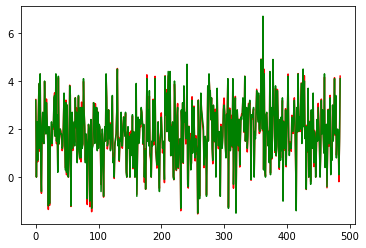

No handles with labels found to put in legend.


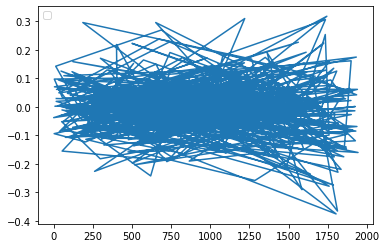

In [13]:
#添加标签画图

Y_pred = rfr.predict(X_test)
plt.figure()
plt.plot(range(len(Y_pred)), Y_pred, 'red', label="predict data")
plt.plot(range(len(y_test)), y_test, 'green', label="test data")
plt.show()

plt.figure()
y = Y_pred - y_test
plt.plot(y)
#图标位于左上角，即第2象限，类似的，1为右上角，3为左下角，4为右下角
plt.legend(loc=2)
plt.show()  # 显示预测值与测试值曲线
